In [0]:
#Unzipping the Clinical Dataset

fileroot="clinicaltrial_2021"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip" , "file:/tmp/")

Out[87]: True

In [0]:
import os
os.environ['fileroot']=fileroot

In [0]:
%sh

unzip -d /tmp/ /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
dbutils.fs.mkdirs("FileStore/tables/" + fileroot +".csv")

Out[90]: True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot + ".csv", True)


Out[91]: True

In [0]:
#Unzipping the Pharma Dataset

fileroot1="pharma"
dbutils.fs.cp("/FileStore/tables/" + fileroot1 + ".zip" , "file:/tmp/")

Out[157]: True

In [0]:
import os
os.environ['fileroot1']=fileroot1

In [0]:
%sh

unzip -d /tmp/ /tmp/$fileroot1.zip

Archive:  /tmp/pharma.zip


In [0]:
dbutils.fs.mkdirs("FileStore/tables/" + fileroot1 +".csv")
dbutils.fs.mv("file:/tmp/" + fileroot1 + ".csv", "/FileStore/tables/" + fileroot1 + ".csv", True)


In [0]:
# File location and type
file_location = "/FileStore/tables/clinicaltrial_2021.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "True"
delimiter = "|"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)



Id Sponsor Status Start Completion Type Submission Conditions Interventions NCT02758028 The University of Hong Kong Recruiting Aug 2005 Nov 2021 Interventional Apr 2016 null null NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autistic Disorder,Autism Spectrum Disorder null NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus null NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Tuberculosis,Lung Diseases,Pulmonary Disease null NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticular Diseases,Diverticulum,Diverticulosis null NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation null NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null NCT02757508 Washington University School of Medicine Completed Mar 2016 Jul 2017 Interventional Apr 2016 null Vitamins NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis null NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy NCT02759276 Daniel Alexandre Bottino Completed May 2015 Dec 2015 Observational Apr 2016 Hypertension null NCT02750956 Bulent Ecevit University Completed Jun 2015 Mar 2016 Observational Apr 2016 Periodontal Diseases null NCT02752113 Institut für Pharmakologie und Präventive Medizin Completed Apr 2016 May 2019 Interventional Apr 2016 Diabetes Mellitus Metformin,Empagliflozin,Linagliptin NCT02752698 The Third Xiangya Hospital of Central South University Active, not recruiting Jan 2015 Dec 2021 Interventional Jun 2015 Appendicitis,Stomach Ulcer,Cholecystolithiasis,Cholelithiasis,Gallstones null NCT02755779 Tel Aviv Medical Center Unknown status Jun 2016 Jun 2017 Observational Apr 2016 null null NCT02750384 Medicines for Malaria Venture Terminated May 2016 Jul 2016 Interventional Apr 2016 null null NCT02754609 James Cook University, Queensland, Australia Completed Sep 2016 Oct 2019 Interventional Apr 2016 Hookworm Infections,Celiac Disease null NCT02755701 Soonchunhyang University Hospital Unknown status Jul 2016 Dec 2018 Interventional Apr 2016 Ascites null NCT02751762 Member Companies of the Opioid PMR Consortium Recruiting Nov 2017 Oct 2022 Observational Apr 2016 Chronic Pain,Substance-Related Disorders,Opioid-Related Disorders,Narcotic-Related Disorders,Behavior null NCT02756299 Marmara University Completed Jun 2014 Apr 2015 Interventional Apr 2016 Sleep Apnea Syndromes,Sleep Apnea null NCT02750709 Cycle Pharmaceuticals Ltd. Completed Oct 2015 Jan 2016 Interventional Apr 2016 Tyrosinemias Nitisinone NCT02753907 Yonsei University Completed Jun 2015 null Interventional Apr 2016 null null NCT02755467 Cutera Inc. Completed May 2016 Apr 2017 Interventional Apr 2016 Hemangioma null NCT02755298 University of Zurich Completed Oct 2016 Nov 2020 Interventional Mar 2016 Hypertension Acetazolamide NCT02759614 Guangdong Association of Clinical Trials Unknown status Apr 2016 Jun 2019 Interventional Mar 2016 Carcinoma Bevacizumab,Erlotinib Hydrochloride NCT02752815 Ruijin Hospital Unknown status Apr 2016 Jun 2020 Interventional Apr 2016 Lymphoma Prednisone,Cyclophosphamide,Rituximab,Vincristine,Epirubicin NCT02757131 The Cleveland Clinic Completed Jul 2016 Jul 2017 Interventional Apr 2016 Iatrogenic Disease null NCT02758704 St. Justine's Hospital Completed Oct 2015 Jun 2021 Interventional Apr 2016 null null NCT02750501 Alcresta Therapeutics, Inc. Completed Jul 2016 Mar 2017 Interventional Apr 2016 Cystic Fibrosis,Fibrosis null NCT02759913 Iron Horse Diagnostics, Inc. Unknown status Jan 2015 De

In [0]:
# Loading clinicaltrial_2021 data into RDD

Clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")
header = Clinicaltrial_2021_rdd.first()
Clinicaltrial_2021_rdd = Clinicaltrial_2021_rdd.filter(lambda x: x != header)
Clinicaltrial_2021_rdd = Clinicaltrial_2021_rdd.map(lambda x: x.split(','))

In [0]:
# Q1 Display number of distinct studies in the dataset.

# Loading  the dataset as an RDD
Clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")

# Get the distinct studies by the Id column and count them
distinct_studies_rdd = Clinicaltrial_2021_rdd.map(lambda x: x.split("|")[0]).distinct().count()

# Print the result
print(f"Number of distinct studies: {distinct_studies_rdd}")

Number of distinct studies: 387262


In [0]:
#Q2 Types of studies in the dataset along with the frequencies of each type.

# Load the dataset as an RDD
Clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")

# Split each row by the delimiter and extract the Type column
types_of_studies_rdd = Clinicaltrial_2021_rdd.map(lambda x: x.split("|")[5])

# Count the frequency of each type and sort in descending order
freq_rdd = types_of_studies_rdd.countByValue().items()
freq_rdd = sorted(freq_rdd, key=lambda x: x[1], reverse=True)

print("Q2 Types of studies in the dataset along with the frequencies of each type")
# Print the result
for t, f in freq_rdd:
    print(f"{t}: {f}")

Q2 Types of studies in the dataset along with the frequencies of each type
Interventional: 301472
Observational: 77540
Observational [Patient Registry]: 8180
Expanded Access: 69
Type: 1


In [0]:
#Q3 Top 5 conditions (from Conditions) with their frequencies.

# Load the dataset as an RDD
Clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")

# Split each row by the delimiter and extract the Conditions column
conditions_rdd = Clinicaltrial_2021_rdd.map(lambda x: x.split("|")[7])

# Count the frequency of each condition and sort in descending order
freq_rdd = conditions_rdd.countByValue().items()
freq_rdd = sorted(freq_rdd, key=lambda x: x[1], reverse=True)

# Get the top 5 conditions
top_conditions_rdd = freq_rdd[:5]

# Print the result
for c, f in top_conditions_rdd:
    print(f"{c}: {f}")


: 65131
Diabetes Mellitus: 7460
Breast Neoplasms: 6054
Carcinoma: 3788
Prostatic Neoplasms: 3700


In [0]:
#Q4 Identifying the Top 10 Sponsors that are Non pharmaceutical companies,

# Loading the dataset as an RDD
Clinicaltrial_2021_rdd = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")

# Filter the RDD to exclude pharmaceutical companies from the Sponsor column
non_pharma_rdd = Clinicaltrial_2021_rdd.filter(lambda x: "pharmaceutical" not in x.split("|")[1].lower())

# Count the number of clinical trials sponsored by each non-pharmaceutical sponsor
counts_rdd = non_pharma_rdd.map(lambda x: (x.split("|")[1], 1)).reduceByKey(lambda a, b: a + b)

# Sort the result in descending order and get the top 10 sponsors
top_sponsors_rdd = counts_rdd.takeOrdered(10, key=lambda x: -x[1])

# Print the result
print(" Top 10 Sponsors that are Non pharmaceutical companies:")
for sponsor, count in top_sponsors_rdd:
    print(f"{sponsor}: {count}")

 Top 10 Sponsors that are Non pharmaceutical companies:
GlaxoSmithKline: 3378
National Cancer Institute (NCI): 3218
AstraZeneca: 2691
Pfizer: 2645
M.D. Anderson Cancer Center: 2414
Assistance Publique - Hôpitaux de Paris: 2369
Mayo Clinic: 2300
Merck Sharp & Dohme Corp.: 2243
Assiut University: 2154
Massachusetts General Hospital: 1971


[('2021-01', 1131), ('2021-02', 934), ('2021-03', 1227), ('2021-04', 967), ('2021-05', 984), ('2021-06', 1094), ('2021-07', 819), ('2021-08', 700), ('2021-09', 528), ('2021-10', 187)]


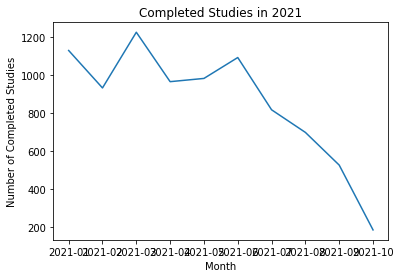

In [0]:
#Q5 Number of completed studies each month in 2021

from datetime import datetime

# Load the data from the text file
data = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")

# Filter the data to include only completed studies in 2021
completed_studies_2021 = data \
    .map(lambda line: line.split("|")) \
    .filter(lambda cols: cols[4].endswith("2021")) \
    .filter(lambda cols: cols[2] == "Completed") \
    .map(lambda cols: (datetime.strptime(cols[4], "%b %Y").strftime("%Y-%m"), 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortByKey()

# Convert the RDD to a list of tuples
completed_studies_2021_list = completed_studies_2021.collect()

# Print the list of tuples
print(completed_studies_2021_list)

# Plot the data using matplotlib
import matplotlib.pyplot as plt

x = [t[0] for t in completed_studies_2021_list]
y = [t[1] for t in completed_studies_2021_list]

plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Number of Completed Studies")
plt.title("Completed Studies in 2021")
plt.show()
